In [1]:
!!wget --no-check-certificate http://www.sandradelafuente.com/app/download/15278429/dog.zip
!!wget --no-check-certificate http://www.sandradelafuente.com/app/download/15279816/cat.zip

['--2020-02-19 20:34:50--  http://www.sandradelafuente.com/app/download/15279816/cat.zip',
 'Resolving www.sandradelafuente.com (www.sandradelafuente.com)... 74.208.215.110, 2607:f1c0:1000:6106:d855:c503:cf73:1830',
 'Connecting to www.sandradelafuente.com (www.sandradelafuente.com)|74.208.215.110|:80... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: unspecified [application/zip]',
 'Saving to: ‘cat.zip’',
 '',
 '',
 'cat.zip                 [<=>                 ]       0  --.-KB/s               ',
 'cat.zip                 [ <=>                ]   2.52M  12.6MB/s               ',
 'cat.zip                 [  <=>               ]   5.71M  14.2MB/s               ',
 'cat.zip                 [   <=>              ]   8.55M  14.2MB/s               ',
 'cat.zip                 [    <=>             ]  11.38M  14.2MB/s               ',
 'cat.zip                 [     <=>            ]  14.22M  14.2MB/s               ',
 'cat.zip                 [      <=>           ] 

In [2]:
!unzip dog.zip
!unzip cat.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: dog/dog.370.jpg         
  inflating: dog/dog.3700.jpg        
  inflating: dog/dog.3701.jpg        
  inflating: dog/dog.3702.jpg        
  inflating: dog/dog.3703.jpg        
  inflating: dog/dog.3704.jpg        
  inflating: dog/dog.3705.jpg        
  inflating: dog/dog.3706.jpg        
  inflating: dog/dog.3707.jpg        
  inflating: dog/dog.3708.jpg        
  inflating: dog/dog.3709.jpg        
  inflating: dog/dog.371.jpg         
  inflating: dog/dog.3710.jpg        
  inflating: dog/dog.3711.jpg        
  inflating: dog/dog.3712.jpg        
  inflating: dog/dog.3713.jpg        
  inflating: dog/dog.3714.jpg        
  inflating: dog/dog.3715.jpg        
  inflating: dog/dog.3716.jpg        
  inflating: dog/dog.3717.jpg        
  inflating: dog/dog.3718.jpg        
  inflating: dog/dog.3719.jpg        
  inflating: dog/dog.372.jpg         
  inflating: dog/dog.3720.jpg        
  inflating: dog/dog.

In [0]:
import json #create the json
import shutil #copy images to train, test and valid dirs
import os #files and dirs manipulation
import math #split calculate

In [0]:
data_set_dirs= ['train','valid','test']

In [0]:
#create training,validation,testing directories

for dsdirs in data_set_dirs:
  path = '/content/' + dsdirs
  os.mkdir( path,755 )

In [0]:
#define proportion of data
train_prop = 0.6
valid_prop = test_prop = (1-train_prop)/2

#CATS
#function to split data of each category into trainning, validation and testing set
def create_dataset_cats():
  for ii,cat in enumerate(category_list):    
    src_path = parent_dir + 'cat/'
    dest_dir1 = parent_dir+'train/cat/' #str(ii)
    dest_dir2 = parent_dir+'valid/cat/'#str(ii)
    dest_dir3 = parent_dir+'test/cat/'#str(ii)
    
    dest_dirs_list = [dest_dir1,dest_dir2,dest_dir3]
    for dirs in dest_dirs_list:
      os.mkdir(dirs,755 )
    
    #get files' names list from respective directories
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    
    #get training, testing and validation files count
    train_count = math.ceil(train_prop*len(files))
    valid_count = int((len(files)-train_count)/2)
    test_count = valid_count
    
    #get files to segragate for train,test and validation data set
    train_data_list = files[0: train_count]
    valid_data_list = files[train_count+1:train_count+1+valid_count]  
    test_data_list =  files[train_count+valid_count:]
       
  
    for train_data in train_data_list:
      train_path = src_path + train_data
      shutil.copy(train_path,dest_dir1)
    
    for valid_data in valid_data_list:
      valid_path = src_path + valid_data
      shutil.copy(valid_path,dest_dir2)
    
    for test_data in test_data_list:
      test_path = src_path + test_data
      shutil.copy(test_path,dest_dir3)

#DOGS
#function to split data of each category into trainning, validation and testing set
def create_dataset_dogs():
  for ii,cat in enumerate(category_list):    
    src_path = parent_dir + 'dog/'
    dest_dir1 = parent_dir+'train/dog/' #str(ii)
    dest_dir2 = parent_dir+'valid/dog/'#str(ii)
    dest_dir3 = parent_dir+'test/dog/'#str(ii)
    
    dest_dirs_list = [dest_dir1,dest_dir2,dest_dir3]
    for dirs in dest_dirs_list:
      os.mkdir(dirs,755 )
    
    #get files' names list from respective directories
    os.chdir(src_path)
    files = [f for f in os.listdir() if os.path.isfile(f)]
    
    #get training, testing and validation files count
    train_count = math.ceil(train_prop*len(files))
    valid_count = int((len(files)-train_count)/2)
    test_count = valid_count
    
    #get files to segragate for train,test and validation data set
    train_data_list = files[0: train_count]
    valid_data_list = files[train_count+1:train_count+1+valid_count]  
    test_data_list =  files[train_count+valid_count:]
       
  
    for train_data in train_data_list:
      train_path = src_path + train_data
      shutil.copy(train_path,dest_dir1)
    
    for valid_data in valid_data_list:
      valid_path = src_path + valid_data
      shutil.copy(valid_path,dest_dir2)
    
    for test_data in test_data_list:
      test_path = src_path + test_data
      shutil.copy(test_path,dest_dir3)

In [7]:
#path configuration
parent_dir = '/content/'
#get category folder list
os.chdir(parent_dir)
category_list = list(filter(lambda x: os.path.isdir(x), os.listdir()))
for category in category_list:
  print(category)

.config
test
cat
dog
train
valid
sample_data


In [0]:
#save category data as dictionary in a json file
cat_data = {}

for ix,cat in enumerate(category_list):
  cat_data[ix] = cat
with open('/content/cat_dogs.json', 'w') as outfile:  
    json.dump(cat_data , outfile)

In [9]:
#Save cats and dogs images in train, test and validation folder:
create_dataset_cats()

FileExistsError: ignored

In [10]:
create_dataset_dogs()

FileExistsError: ignored

In [11]:
# define location of dataset
import sys, os
import numpy as np
import matplotlib.pyplot as plt

folder = '/content/'
folder_dog_train= '/content/dog/'
dog_num=os.listdir(folder_dog_train)
idog=np.size(dog_num)
print(idog)
folder_cat_train= '/content/cat/'
cat_num=os.listdir(folder_cat_train)
icat=np.size(cat_num)
#dog_num[1]
#filename=folder_dog_train+dog_num[1]
#ejemplo=skimage.io.imread(filename)
#plt.imshow(ejemplo)

4000


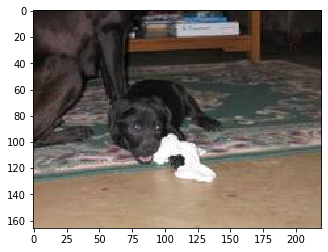

In [12]:
# plot first few images
import skimage
from skimage import io
image=[]

for i in range(idog):
	filename=folder_dog_train+dog_num[i]
	#print("filename: ",folder_dog_train+dog_num[i])
	image.append(skimage.io.imread(filename))

plt.imshow(image[2])
#print(len(image))

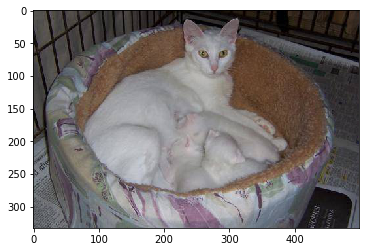

In [13]:
image_cat=[]

for i in range(icat):
	filename_cat=folder_cat_train+cat_num[i]
	image_cat.append(skimage.io.imread(filename_cat))

plt.imshow(image_cat[2])
#print(len(image))

In [14]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
import tensorflow as tf

Using TensorFlow backend.


In [0]:
# Helper functions:
def plotSumm(history, name):
  history_dict = history.history
  history_dict.keys()
  print(history.history)
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc)+1)
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.savefig('/content/'+name+'-plot.png')

  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.savefig('/content/'+name+'-plot.png')
  plt.legend()
  #plt.savefig('/content/'+name+'-plot.png')
  plt.show()
  #filename = sys.argv[0].split('/')[-1]
  #plt.savefig(filename + '_plot.png')
  #plt.savefig('/content/'+name+'-plot.png')

def summarize_diagnostics(history, name):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['acc'], color='blue', label='train')
    plt.plot(history.history['val_acc'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.savefig('/content/'+name+'-plot.png')
    plt.close()

# Regularizacion con L1

In [0]:
from keras.regularizers import l1
# instantiate regularizer
reg = l1(0.001)

In [0]:
def define_model6():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
      layer.trainable = False
      flat1 = Flatten()(model.layers[-1].output)
      class1 = Dense(1024, activation='relu', kernel_initializer='he_uniform', activity_regularizer=l1(0.001))(flat1)
      dense1 = Dense(8, activation='relu')(class1)
      preoutput = Dense(4, activation='relu')(dense1)
      output = Dense(1, activation='sigmoid', name='predictions')(preoutput)
      model = Model(inputs=model.inputs, outputs=output)
      opt = SGD(lr=0.0001, momentum=0.9)
      model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
      return model

In [19]:
model = define_model6()
# crear generador de datos
datagen = ImageDataGenerator(featurewise_center=True)
# especificar valores medios de imagenet para centrar
datagen.mean = [123.68, 116.779, 103.939]
# preparar el iterador
train_it = datagen.flow_from_directory('/content/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
val_it = datagen.flow_from_directory('/content/valid/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
# entrenar modelo
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)
# evaluar modelo
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
#model.save('/content/model6B.h5')





58892288/58889256 [==============================] - 7s 0us/step








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 4800 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


Epoch 1/10
75/75 [==============================] - 100s 1s/step - loss: 7.3748 - acc: 0.4981 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/10
75/75 [==============================] - 87s 1s/step - loss: 0.6931 - acc: 0.4900 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/10
75/75 [==============================] - 87s 1s/step - loss: 0.6931 - acc: 0.4946 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/10
75/75 [==============================] - 87s 1s/step - loss: 0.6931 - acc: 0.4937 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/10
75/75 [==============================] - 87s 1s/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/10
75/75 [==============================] 

# Regularización con L2

In [0]:
from keras.regularizers import l2
from tensorflow import keras

In [0]:
def define_model6():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
      layer.trainable = False
      flat1 = Flatten()(model.layers[-1].output)
      class1 = Dense(1024, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(l=0.1))(flat1)
      dense1 = Dense(8, activation='relu')(class1)
      preoutput = Dense(4, activation='relu')(dense1)
      output = Dense(1, activation='sigmoid', name='predictions')(preoutput)
      model = Model(inputs=model.inputs, outputs=output)
      opt = SGD(lr=0.0001, momentum=0.9)
      model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
      return model

In [25]:
model = define_model6()
# crear generador de datos
datagen = ImageDataGenerator(featurewise_center=True)
# especificar valores medios de imagenet para centrar
datagen.mean = [123.68, 116.779, 103.939]
# preparar el iterador
train_it = datagen.flow_from_directory('/content/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
val_it = datagen.flow_from_directory('/content/valid/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
# entrenar modelo
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)
# evaluar modelo
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
#model.save('/content/model6B.h5')

Found 4800 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/10
75/75 [==============================] - 93s 1s/step - loss: 202.7869 - acc: 0.8479 - val_loss: 199.5684 - val_acc: 0.9625
Epoch 2/10
75/75 [==============================] - 90s 1s/step - loss: 196.6179 - acc: 0.9731 - val_loss: 193.6450 - val_acc: 0.9738
Epoch 3/10
75/75 [==============================] - 90s 1s/step - loss: 190.7680 - acc: 0.9856 - val_loss: 187.9022 - val_acc: 0.9769
Epoch 4/10
75/75 [==============================] - 90s 1s/step - loss: 185.1070 - acc: 0.9921 - val_loss: 182.3461 - val_acc: 0.9744
Epoch 5/10
75/75 [==============================] - 90s 1s/step - loss: 179.6188 - acc: 0.9958 - val_loss: 176.9526 - val_acc: 0.9738
Epoch 6/10
75/75 [==============================] - 90s 1s/step - loss: 174.2970 - acc: 0.9971 - val_loss: 171.7114 - val_acc: 0.9762
Epoch 7/10
75/75 [==============================] - 90s 1s/step - loss

{'val_loss': [199.56842163085938, 193.64496337890625, 187.902216796875, 182.34610107421875, 176.95262145996094, 171.71140258789063, 166.62744262695313, 161.69149291992187, 156.914931640625, 152.2654638671875], 'val_acc': [0.9625, 0.97375, 0.976875, 0.974375, 0.97375, 0.97625, 0.974375, 0.975625, 0.978125, 0.976875], 'loss': [202.786865234375, 196.61790100097656, 190.76797322591145, 185.10703287760415, 179.61884216308593, 174.2970225016276, 169.13407979329426, 164.12473225911458, 159.26383422851563, 154.54749104817708], 'acc': [0.8479166666666667, 0.973125, 0.985625, 0.9920833333333333, 0.9958333333333333, 0.9970833333333333, 0.9975, 0.9983333333333333, 0.99875, 0.9991666666666666]}


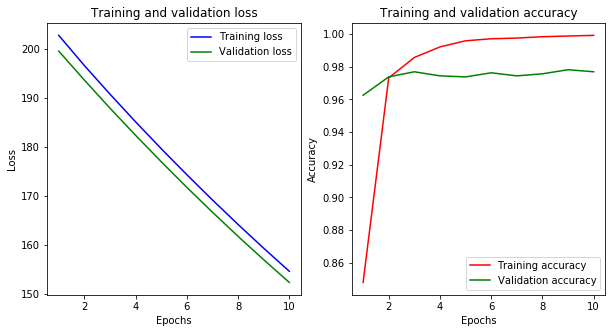

In [26]:
plotSumm(history,"L2_1Layer")

## Prueba con regularizacion en todas las capas adicionales

In [0]:
def define_model6():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
      layer.trainable = False
      flat1 = Flatten()(model.layers[-1].output)
      class1 = Dense(1024, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(l=0.1))(flat1)
      dense1 = Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.1))(class1)
      preoutput = Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.1))(dense1)
      output = Dense(1, activation='sigmoid', name='predictions', kernel_regularizer=keras.regularizers.l2(l=0.1))(preoutput)
      model = Model(inputs=model.inputs, outputs=output)
      opt = SGD(lr=0.0001, momentum=0.9)
      model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
      return model

In [28]:
model = define_model6()
# crear generador de datos
datagen = ImageDataGenerator(featurewise_center=True)
# especificar valores medios de imagenet para centrar
datagen.mean = [123.68, 116.779, 103.939]
# preparar el iterador
train_it = datagen.flow_from_directory('/content/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
val_it = datagen.flow_from_directory('/content/valid/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
# entrenar modelo
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)
# evaluar modelo
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
#model.save('/content/model6B.h5')

Found 4800 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/10
75/75 [==============================] - 92s 1s/step - loss: 205.4458 - acc: 0.6821 - val_loss: 202.2529 - val_acc: 0.9194
Epoch 2/10
75/75 [==============================] - 90s 1s/step - loss: 199.2627 - acc: 0.9500 - val_loss: 196.2407 - val_acc: 0.9494
Epoch 3/10
75/75 [==============================] - 90s 1s/step - loss: 193.3376 - acc: 0.9729 - val_loss: 190.4393 - val_acc: 0.9569
Epoch 4/10
75/75 [==============================] - 89s 1s/step - loss: 187.6100 - acc: 0.9827 - val_loss: 184.8078 - val_acc: 0.9575
Epoch 5/10
75/75 [==============================] - 89s 1s/step - loss: 182.0576 - acc: 0.9846 - val_loss: 179.3394 - val_acc: 0.9600
Epoch 6/10
75/75 [==============================] - 89s 1s/step - loss: 176.6712 - acc: 0.9892 - val_loss: 174.0413 - val_acc: 0.9600
Epoch 7/10
75/75 [==============================] - 89s 1s/step - loss

{'val_loss': [202.25289428710937, 196.2407012939453, 190.43929809570312, 184.8078125, 179.33940002441406, 174.0412921142578, 168.8941650390625, 163.89139282226563, 159.0552947998047, 154.3555029296875], 'val_acc': [0.919375, 0.949375, 0.956875, 0.9575, 0.96, 0.96, 0.96, 0.965625, 0.95625, 0.956875], 'loss': [205.4458056640625, 199.26269999186198, 193.337568359375, 187.60999450683593, 182.057646484375, 176.67121317545573, 171.44408711751302, 166.37249593098957, 161.45158894856772, 156.67649841308594], 'acc': [0.6820833333333334, 0.95, 0.9729166666666667, 0.9827083333333333, 0.9845833333333334, 0.9891666666666666, 0.9902083333333334, 0.9925, 0.993125, 0.9935416666666667]}


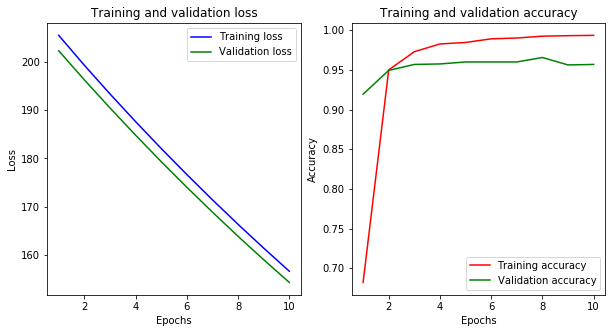

In [30]:
plotSumm(history,"L2_AllLayers")

## Pruebas con distintos valores

In [0]:
def define_model6():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
      layer.trainable = False
      flat1 = Flatten()(model.layers[-1].output)
      class1 = Dense(1024, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(l=0.01))(flat1)
      dense1 = Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.01))(class1)
      preoutput = Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.01))(dense1)
      output = Dense(1, activation='sigmoid', name='predictions', kernel_regularizer=keras.regularizers.l2(l=0.01))(preoutput)
      model = Model(inputs=model.inputs, outputs=output)
      opt = SGD(lr=0.0001, momentum=0.9)
      model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
      return model

In [32]:
model = define_model6()
# crear generador de datos
datagen = ImageDataGenerator(featurewise_center=True)
# especificar valores medios de imagenet para centrar
datagen.mean = [123.68, 116.779, 103.939]
# preparar el iterador
train_it = datagen.flow_from_directory('/content/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
val_it = datagen.flow_from_directory('/content/valid/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
# entrenar modelo
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)
# evaluar modelo
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
#model.save('/content/model6B.h5')

Found 4800 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/10
75/75 [==============================] - 95s 1s/step - loss: 21.3856 - acc: 0.7285 - val_loss: 21.1141 - val_acc: 0.8975
Epoch 2/10
75/75 [==============================] - 92s 1s/step - loss: 21.0363 - acc: 0.9221 - val_loss: 20.9919 - val_acc: 0.9350
Epoch 3/10
75/75 [==============================] - 91s 1s/step - loss: 20.9362 - acc: 0.9546 - val_loss: 20.9171 - val_acc: 0.9569
Epoch 4/10
75/75 [==============================] - 91s 1s/step - loss: 20.8582 - acc: 0.9681 - val_loss: 20.8531 - val_acc: 0.9556
Epoch 5/10
75/75 [==============================] - 91s 1s/step - loss: 20.7867 - acc: 0.9735 - val_loss: 20.7836 - val_acc: 0.9600
Epoch 6/10
75/75 [==============================] - 91s 1s/step - loss: 20.7166 - acc: 0.9800 - val_loss: 20.7179 - val_acc: 0.9631
Epoch 7/10
75/75 [==============================] - 91s 1s/step - loss: 20.6493 - 

{'val_loss': [21.114062881469728, 20.99190612792969, 20.91714859008789, 20.853145446777344, 20.783552169799805, 20.717879333496093, 20.655902404785156, 20.607649993896484, 20.54103942871094, 20.474060745239257], 'val_acc': [0.8975, 0.935, 0.956875, 0.955625, 0.96, 0.963125, 0.963125, 0.95625, 0.959375, 0.961875], 'loss': [21.385607452392577, 21.036347249348957, 20.936184692382813, 20.85821350097656, 20.786747411092122, 20.716563517252606, 20.649309616088868, 20.58234873453776, 20.51647033691406, 20.45127591451009], 'acc': [0.7285416666666666, 0.9220833333333334, 0.9545833333333333, 0.968125, 0.9735416666666666, 0.98, 0.983125, 0.990625, 0.9914583333333333, 0.993125]}


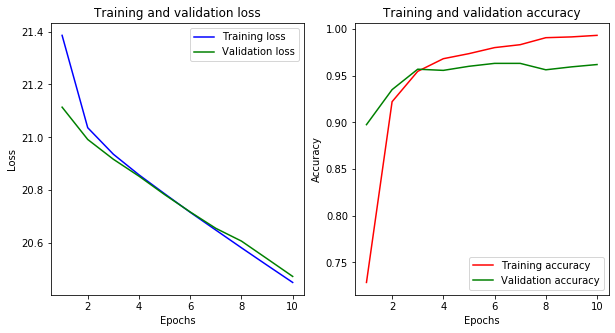

In [33]:
plotSumm(history,"L2_AllLayersChnVal")

In [0]:
def define_model6():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
      layer.trainable = False
      flat1 = Flatten()(model.layers[-1].output)
      class1 = Dense(1024, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l2(l=0.001))(flat1)
      dense1 = Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001))(class1)
      preoutput = Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(l=0.001))(dense1)
      output = Dense(1, activation='sigmoid', name='predictions', kernel_regularizer=keras.regularizers.l2(l=0.001))(preoutput)
      model = Model(inputs=model.inputs, outputs=output)
      opt = SGD(lr=0.0001, momentum=0.9)
      model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
      return model

In [19]:
model = define_model6()
# crear generador de datos
datagen = ImageDataGenerator(featurewise_center=True)
# especificar valores medios de imagenet para centrar
datagen.mean = [123.68, 116.779, 103.939]
# preparar el iterador
train_it = datagen.flow_from_directory('/content/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
val_it = datagen.flow_from_directory('/content/valid/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
# entrenar modelo
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)
# evaluar modelo
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
#model.save('/content/model6B.h5')





58892288/58889256 [==============================] - 1s 0us/step








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 4800 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


Epoch 1/10
75/75 [==============================] - 88s 1s/step - loss: 2.8507 - acc: 0.5081 - val_loss: 2.7638 - val_acc: 0.5006
Epoch 2/10
75/75 [==============================] - 71s 945ms/step - loss: 2.7623 - acc: 0.5033 - val_loss: 2.7613 - val_acc: 0.5044
Epoch 3/10
75/75 [==============================] - 71s 952ms/step - loss: 2.7359 - acc: 0.5452 - val_loss: 2.6077 - val_acc: 0.7475
Epoch 4/10
75/75 [==============================] - 73s 969ms/step - loss: 2.5249 - acc: 0.8865 - val_loss: 2.4696 - val_acc: 0.9419
Epoch 5/10
75/75 [==============================] - 73s 967ms/step - loss: 2.4623 - acc: 0.9458 - val_loss: 2.4528 - val_acc: 0.9556
Epoch 6/10
75/75 [=====================

# Combinar L1 y L2

In [0]:
def define_model6():
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    for layer in model.layers:
      layer.trainable = False
      flat1 = Flatten()(model.layers[-1].output)
      class1 = Dense(1024, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01))(flat1)
      dense1 = Dense(8, activation='relu', kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01))(class1)
      preoutput = Dense(4, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01))(dense1)
      output = Dense(1, activation='sigmoid', name='predictions', kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01))(preoutput)
      model = Model(inputs=model.inputs, outputs=output)
      opt = SGD(lr=0.0001, momentum=0.9)
      model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
      return model

In [21]:
model = define_model6()
# crear generador de datos
datagen = ImageDataGenerator(featurewise_center=True)
# especificar valores medios de imagenet para centrar
datagen.mean = [123.68, 116.779, 103.939]
# preparar el iterador
train_it = datagen.flow_from_directory('/content/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
val_it = datagen.flow_from_directory('/content/valid/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
# entrenar modelo
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=val_it, validation_steps=len(val_it), epochs=10, verbose=1)
# evaluar modelo
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))
#model.save('/content/model6B.h5')

Found 4800 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Epoch 1/10
75/75 [==============================] - 77s 1s/step - loss: 13487.5591 - acc: 0.8754 - val_loss: 6621.2560 - val_acc: 0.9581
Epoch 2/10
75/75 [==============================] - 75s 1s/step - loss: 2705.8669 - acc: 0.9773 - val_loss: 268.6642 - val_acc: 0.9675
Epoch 3/10
75/75 [==============================] - 75s 1s/step - loss: 87.5574 - acc: 0.9242 - val_loss: 49.6278 - val_acc: 0.9487
Epoch 4/10
75/75 [==============================] - 75s 1s/step - loss: 46.4359 - acc: 0.9515 - val_loss: 43.6111 - val_acc: 0.9663
Epoch 5/10
75/75 [==============================] - 75s 1s/step - loss: 41.4782 - acc: 0.9544 - val_loss: 39.4424 - val_acc: 0.9675
Epoch 6/10
75/75 [==============================] - 76s 1s/step - loss: 37.5316 - acc: 0.9600 - val_loss: 35.7998 - val_acc: 0.9419
Epoch 7/10
75/75 [==============================] - 76s 1s/step - loss: 34

{'val_loss': [6621.25603515625, 268.6642431640625, 49.62777542114258, 43.61112487792969, 39.442429809570314, 35.799762115478515, 32.7720913696289, 30.397655029296875, 28.892956771850585, 28.111068344116212], 'val_acc': [0.958125, 0.9675, 0.94875, 0.96625, 0.9675, 0.941875, 0.969375, 0.966875, 0.959375, 0.966875], 'loss': [13487.559108072917, 2705.8668595377603, 87.55739278157552, 46.43593353271484, 41.478241017659506, 37.53160725911459, 34.20002202351888, 31.567567545572917, 29.598467356363933, 28.403333053588867], 'acc': [0.8754166666666666, 0.9772916666666667, 0.9241666666666667, 0.9514583333333333, 0.954375, 0.96, 0.96875, 0.971875, 0.971875, 0.9760416666666667]}


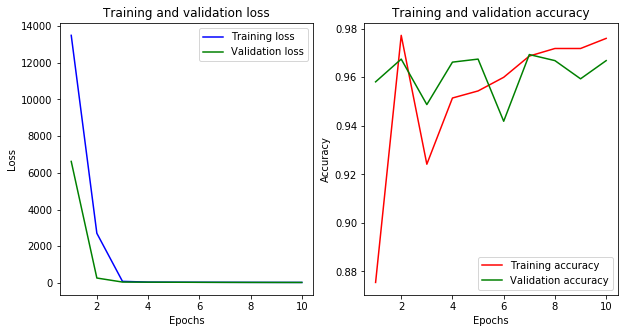

In [22]:
plotSumm(history,"L1&L2")